<a href="https://colab.research.google.com/github/roopesh907/ML_-projects/blob/main/Mental_Health_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Mental_health_dataset.csv')

In [ ]:
df.head()

,Age,Gender,PHQ9,GAD7,DASS21_Depression,DASS21_Anxiety,DASS21_Stress,Mood_Score,Mental_Health_Status
0,54,Female,15,21,41,32,42,9,Severe
1,42,Male,16,21,6,42,4,7,Severe
2,51,Male,9,5,0,26,7,5,Mild
3,56,Male,22,0,42,4,14,10,Severe
4,26,Female,15,9,31,29,31,7,Severe


In [ ]:
df.describe()

,Age,PHQ9,GAD7,DASS21_Depression,DASS21_Anxiety,DASS21_Stress,Mood_Score
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.722333,13.298333,10.410667,21.209000,20.836667,20.819333,5.615333
std,12.515755,7.995038,6.396900,12.360835,12.330910,12.585183,2.884812
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,28.000000,6.000000,5.000000,11.000000,10.000000,10.000000,3.000000
50%,39.000000,13.000000,10.000000,21.000000,21.000000,21.000000,6.000000
75%,50.000000,20.000000,16.000000,32.000000,31.000000,32.000000,8.000000
max,60.000000,27.000000,21.000000,42.000000,42.000000,42.000000,10.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_encoded = df.copy()
df_encoded.columns

Index(['Age', 'Gender', 'PHQ9', 'GAD7', 'DASS21_Depression', 'DASS21_Anxiety',
       'DASS21_Stress', 'Mood_Score', 'Mental_Health_Status'],
      dtype='object')

In [ ]:
le_gender = LabelEncoder()
df_encoded['Gender'] = le_gender.fit_transform(df_encoded['Gender'])
le_status = LabelEncoder()
df_encoded['Mental_Health_Status'] = le_status.fit_transform(df_encoded['Mental_Health_Status'])

In [ ]:
print(df_encoded.head())

   Age  Gender  PHQ9  GAD7  DASS21_Depression  DASS21_Anxiety  DASS21_Stress  \
0   54       0    15    21                 41              32             42   
1   42       1    16    21                  6              42              4   
2   51       1     9     5                  0              26              7   
3   56       1    22     0                 42               4             14   
4   26       0    15     9                 31              29             31   

   Mood_Score  Mental_Health_Status  
0           9                     3  
1           7                     3  
2           5                     0  
3          10                     3  
4           7                     3  


In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_encoded.drop("Mental_Health_Status", axis=1)
y = df_encoded["Mental_Health_Status"]

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check the shape
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 2400
Testing samples: 600


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Initialize the model (you can try different kernels later)
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict
y_pred = svm_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("SVM Accuracy:", round(accuracy * 100, 2), "%")
print("SVM F1 Score:", round(f1 * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

SVM Accuracy: 89.33 %
SVM F1 Score: 88.54 %

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.43      0.52        28
           1       0.75      0.73      0.74       116
           2       0.00      0.00      0.00         5
           3       0.94      0.97      0.96       451

    accuracy                           0.89       600
   macro avg       0.59      0.53      0.55       600
weighted avg       0.88      0.89      0.89       600



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Try different C and gamma values
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters:", grid.best_params_)

# Predict using the best estimator
y_pred = grid.predict(X_test_scaled)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Tuned SVM Accuracy:", round(accuracy * 100, 2), "%")
print("Tuned SVM F1 Score:", round(f1 * 100, 2), "%")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Tuned SVM Accuracy: 92.0 %
Tuned SVM F1 Score: 91.89 %


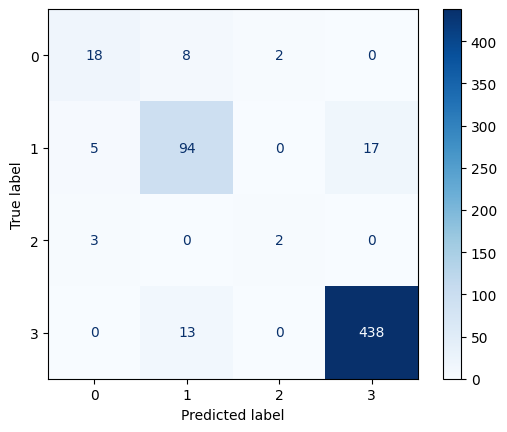

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(grid, X_test_scaled, y_test, cmap="Blues")

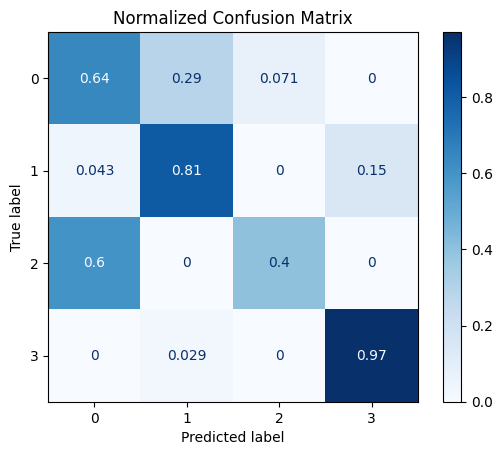

In [ ]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, grid.predict(X_test_scaled), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot(cmap="Blues")
plt.title("Normalized Confusion Matrix")
plt.show()

In [ ]:
import joblib
joblib.dump(grid, 'svm_mental_health_model.pkl')

['svm_mental_health_model.pkl']